In [36]:
# libraries 

import random
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import cv2

import tensorflow as tf
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd 
import numpy as np


In [37]:
# # train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/train/'
# val_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/val/'
# test_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/test/'

In [38]:
# ## Using undersampled training set
# train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/under_sampled_aptos/train/'

In [39]:
train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/script/3_class/dataset/train/'
val_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/script/3_class/dataset/val/'
test_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/script/3_class/dataset/test/'

## Variables


In [40]:
IMAGE_SIZE = 256
EPOCH = 20

# Image Pre-processing 

In [41]:
def custom_preprocessing(image):
    return cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 10) ,-4 ,128)
    
    

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
#     preprocessing_function = custom_preprocessing
)

In [43]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
#     color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=24,
)

Found 2930 images belonging to 3 classes.


In [44]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['NPDR', 'No_DR', 'PDR']

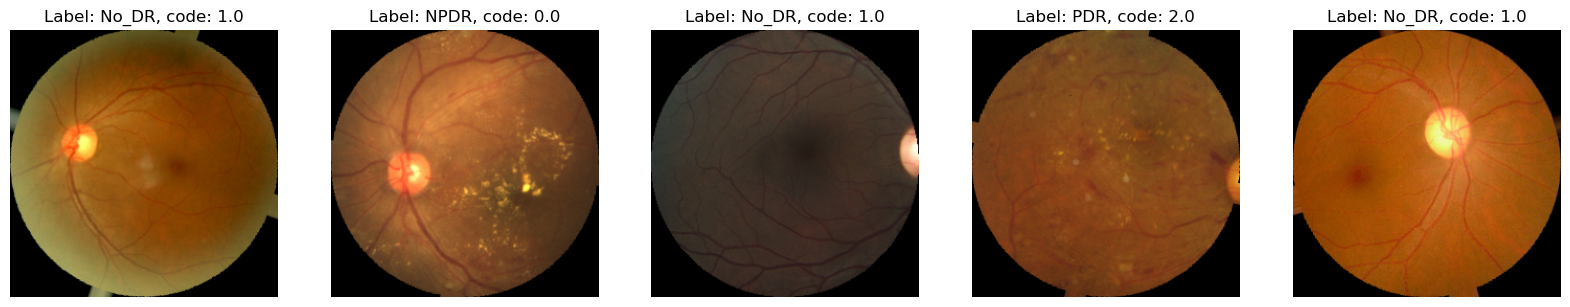

In [45]:

# Get the next batch of images and labels from the generator
images, labels = train_generator.next()

# Display the first 5 images from the batch
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(class_labels[int(labels[i])])+', code: {}'.format(labels[i]))
    ax.axis('off')

plt.show()

In [46]:
# for validation 
validation_datagen = ImageDataGenerator(
    rescale=1./255,
#     preprocessing_function = custom_preprocessing
)

In [47]:
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=24,
#     color_mode='grayscale',
)

Found 366 images belonging to 3 classes.


In [76]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
#     preprocessing_function = custom_preprocessing
)

In [77]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,
    seed=24,
#     color_mode='grayscale',
)

Found 366 images belonging to 3 classes.


In [78]:
class_labels_test_data = list(test_generator.class_indices.keys())
class_labels_test_data

['NPDR', 'No_DR', 'PDR']

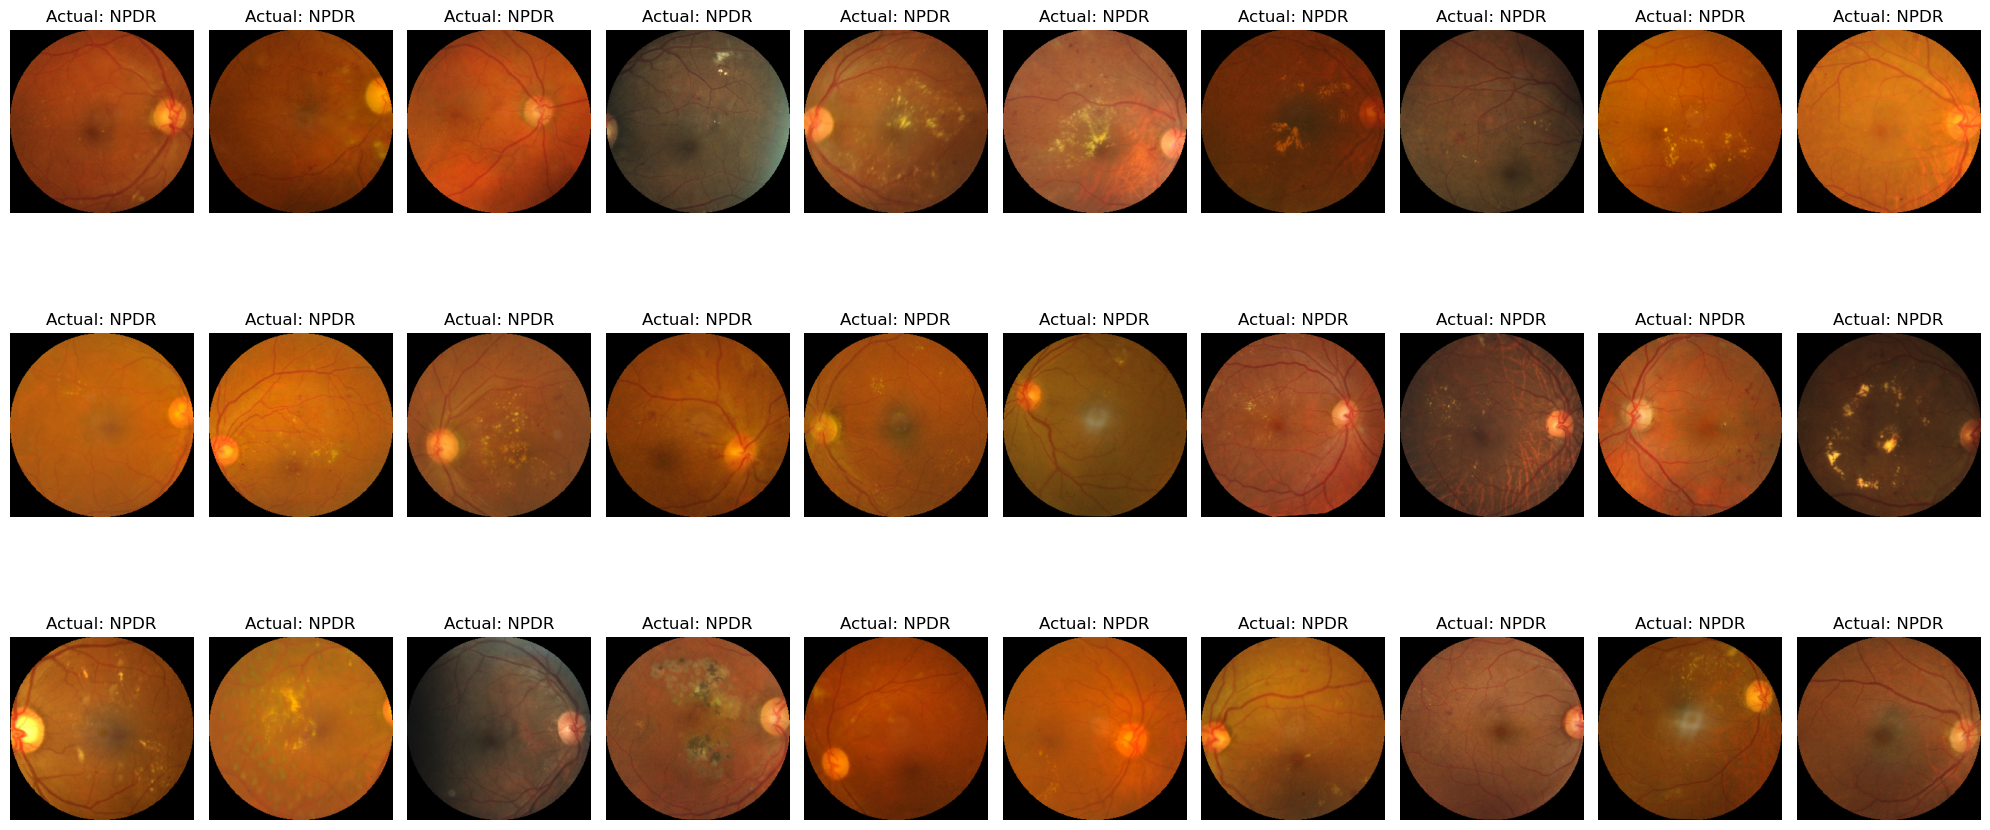

In [79]:
images, labels = test_generator.next()

# Display the first 30 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Actual: {}'.format(class_labels_test_data[int(labels[i])]))
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model creation

In [52]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))



In [53]:
for layer in InceptionV3_model.layers:
    layer.trainable = False

In [54]:
model = Sequential()
model.add(InceptionV3_model)
# model.add(Dropout(0.25))
model.add(Flatten()),
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [55]:
# model = keras.Sequential([
#     keras.layers.Conv2D(32, 3, input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), activation='relu'),
#     keras.layers.MaxPooling2D(),
    
#     keras.layers.Conv2D(64, 3, activation='relu'),
#     keras.layers.MaxPooling2D(),

    
# #     keras.layers.Conv2D(128, 3, activation='relu'),
# #     keras.layers.MaxPooling2D(),
    
#     keras.layers.Conv2D(256, 3, activation='relu'),
#     keras.layers.MaxPooling2D(),
    
# #     keras.layers.Conv2D(512, 3, activation='relu'),
# #     keras.layers.MaxPooling2D(),
    
#     keras.layers.Dropout(0.25),
    
#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.25),
    
# #     keras.layers.Dense(1024, activation='relu'),

    
#     keras.layers.Dense(512, activation='relu'),
    
        
#     keras.layers.Dense(256, activation='relu'),

    
#     keras.layers.Dense(5, activation='softmax')
    
# ])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_7 (Dense)             (None, 1024)              75498496  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 5)                

In [57]:
from keras.callbacks import ReduceLROnPlateau

In [58]:
# hyper-parameters
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,
                              verbose=0, mode='auto', min_delta=0.0001,
                              cooldown=0, min_lr=0)
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [59]:
h = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCH,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    callbacks=[reduce_lr,early_stopping],

)

Epoch 1/20
91/91 [==============================] - 936s 10s/step - loss: 6.1197 - accuracy: 0.6177 - val_loss: 0.5469 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 2/20
91/91 [==============================] - 864s 9s/step - loss: 0.6358 - accuracy: 0.7346 - val_loss: 0.4984 - val_accuracy: 0.7642 - lr: 0.0010
Epoch 3/20
91/91 [==============================] - 865s 9s/step - loss: 0.5499 - accuracy: 0.7688 - val_loss: 0.4228 - val_accuracy: 0.8097 - lr: 0.0010
Epoch 4/20
91/91 [==============================] - 874s 10s/step - loss: 0.5048 - accuracy: 0.7892 - val_loss: 0.3962 - val_accuracy: 0.8210 - lr: 0.0010
Epoch 5/20
91/91 [==============================] - 908s 10s/step - loss: 0.4714 - accuracy: 0.8050 - val_loss: 0.4304 - val_accuracy: 0.8153 - lr: 0.0010
Epoch 6/20
91/91 [==============================] - 887s 10s/step - loss: 0.4519 - accuracy: 0.8050 - val_loss: 0.4897 - val_accuracy: 0.7585 - lr: 0.0010
Epoch 7/20
91/91 [==============================] - 890s 10s/step - loss

In [60]:
def visualize_performance(history):
    #Visualizing the training performance
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='val_Loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')

    plt.title('Loss evolution')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy evolution')

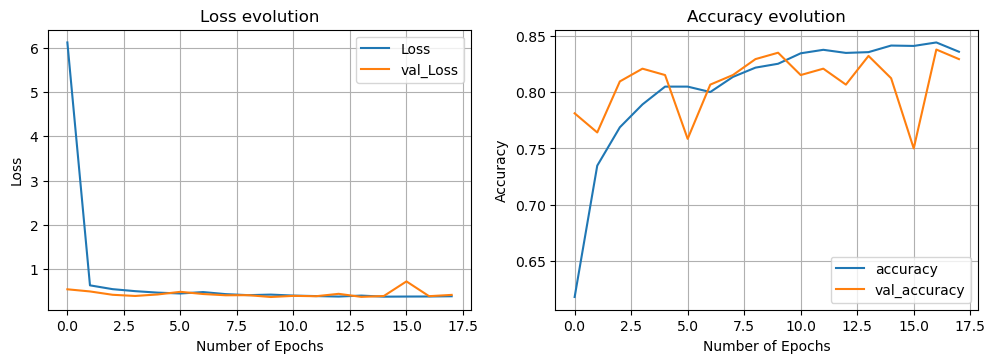

In [61]:
visualize_performance(h)

In [80]:
model.evaluate(test_generator)

12/12 [==============================] - 38s 3s/step - loss: 0.3955 - accuracy: 0.8333


[0.3954906463623047, 0.8333333134651184]

In [81]:
predictions = model.predict(test_generator, steps=test_generator.samples/test_generator.batch_size)
predictions

11/11 [==============================] - 38s 3s/step


array([[7.73902833e-01, 2.89034145e-03, 2.23183751e-01, 2.28349763e-05,
        2.77883743e-07],
       [5.56448340e-01, 1.28743565e-02, 4.30184364e-01, 4.49073210e-04,
        4.38922943e-05],
       [1.08554229e-01, 8.84457588e-01, 6.98282337e-03, 3.37527376e-06,
        1.99968417e-06],
       ...,
       [4.36230600e-01, 1.54896697e-03, 5.62148809e-01, 6.76429991e-05,
        3.97694930e-06],
       [6.35558844e-01, 2.24222167e-04, 3.64212304e-01, 4.60947240e-06,
        1.47134518e-08],
       [2.72086591e-01, 3.59755039e-04, 7.27550447e-01, 3.00006218e-06,
        1.87419488e-07]], dtype=float32)

In [82]:
predicted_classes = [np.argmax(pred) for pred in predictions]
predicted_classes[:30]

[0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1]

In [85]:
true_classes = test_generator.classes
true_classes[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [86]:
class_labels_test_data = list(test_generator.class_indices.keys())
class_labels_test_data

['NPDR', 'No_DR', 'PDR']

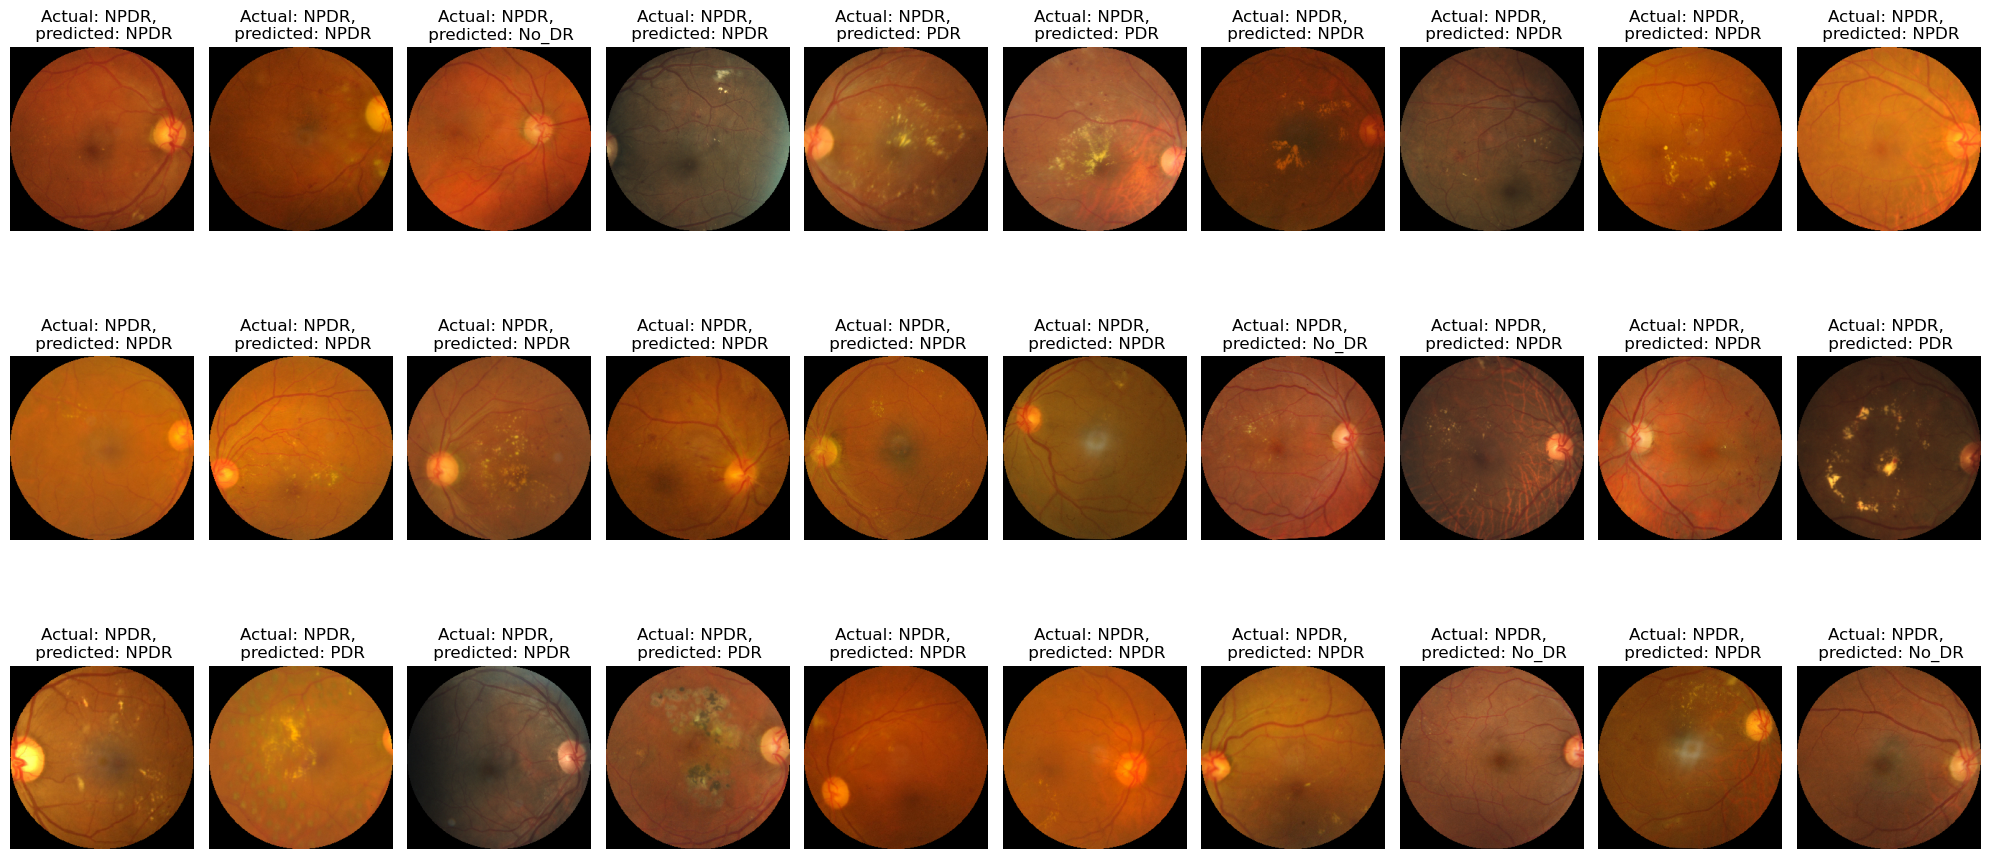

In [87]:
# Get the next batch of images and labels from the generator
# images, labels = test_generator.next()

# Display the first 30 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Actual: {}'.format(class_labels_test_data[int(labels[i])])+', \n predicted: {}'.format(class_labels_test_data[predicted_classes[i]]))
    ax.axis('off')

plt.tight_layout()
plt.show()

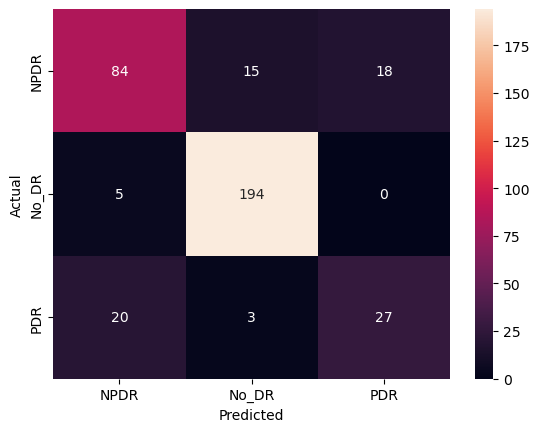

In [88]:
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels_test_data, yticklabels= class_labels_test_data)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [89]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels_test_data)
print(report) 

              precision    recall  f1-score   support

        NPDR       0.77      0.72      0.74       117
       No_DR       0.92      0.97      0.94       199
         PDR       0.60      0.54      0.57        50

    accuracy                           0.83       366
   macro avg       0.76      0.74      0.75       366
weighted avg       0.83      0.83      0.83       366

